In [1]:
"""Build a sentiment analysis / polarity model

Sentiment analysis can be casted as a binary text classification problem,
that is fitting a linear classifier on features extracted from the text
of the user messages so as to guess whether the opinion of the author is
positive or negative.

In this examples we will use a movie review dataset.

"""
# Author: Olivier Grisel <olivier.grisel@ensta.org>
# License: Simplified BSD

import sys, os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [10]:
%config IPCompleter.greedy=True

In [4]:
# the training data folder must be passed as first argument
# directory = directory = os.path.dirname(os.path.realpath(__file__))
movie_reviews_data_folder = "../data/movie_reviews/txt_sentoken/"
dataset = load_files(movie_reviews_data_folder, shuffle=False)

In [5]:
# # split the dataset in training and test set:
docs_train, docs_test, y_train, y_test = train_test_split(
dataset.data, dataset.target, test_size=0.25, random_state=None)

In [8]:
# # TASK: Build a vectorizer / classifier pipeline that filters out tokens
# # that are too rare or too frequent

vectorizer = TfidfVectorizer(max_df = 0.8, min_df = 0.2)
classifier = LinearSVC()
pipeline = Pipeline([
    ('vect', vectorizer),
    ('class', classifier)])

In [9]:
pg = {
    'vect__ngram_range': [(1, 1), (2, 2)], # best: (1, 1) , (1, 2) is better than both
    'class__C': [1e-4, 1e-3, 1e-2, 1e-1, 1] # best: 0.1
}

# # TASK: print the cross-validated scores for the each parameters set
# # explored by the grid search

gs = GridSearchCV(pipeline, cv = 3, param_grid = pg, n_jobs = -1)
gs.fit(docs_train, y_train)
print(gs.best_params_)

{'class__C': 0.1, 'vect__ngram_range': (1, 1)}


In [14]:
# # TASK: Predict the outcome on the testing set and store it in a variable
# # named y_predicted

y_predicted = gs.predict(docs_test)

# # Print the classification report
print(metrics.classification_report(
    y_test, y_predicted, 
    target_names=dataset.target_names))

              precision    recall  f1-score   support

         neg       0.76      0.77      0.77       260
         pos       0.75      0.74      0.75       240

   micro avg       0.76      0.76      0.76       500
   macro avg       0.76      0.76      0.76       500
weighted avg       0.76      0.76      0.76       500



In [15]:
# # Print and plot the confusion matrix
cm = metrics.confusion_matrix(y_test, y_predicted)
print(cm)

[[201  59]
 [ 62 178]]


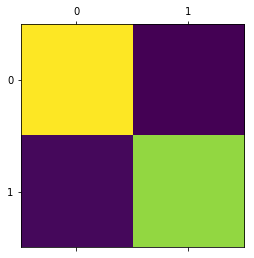

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.matshow(cm)
plt.show()